In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data = pd.read_csv("data/diff_preprocessed.csv")
data = data[data["winner"] != 0.5]
m = len(data)
test, cv, train = data.iloc[:round(0.1*m)], data.iloc[round(0.1*m): round(0.2*m)], data.iloc[round(0.2*m):]
x_cols = data.columns.drop(["winner"])
X_test, y_test = test[x_cols].values, test["winner"].values
X_cv, y_cv = cv[x_cols].values, cv["winner"].values
X_train, y_train = train[x_cols].values, train["winner"].values

In [4]:
model = RandomForestClassifier(n_estimators= 500, min_samples_split= 20, min_samples_leaf= 10, max_depth= 40)
model.fit(X_train, y_train)



,n_estimators,500
,criterion,'gini'
,max_depth,40
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
model.score(X_cv,y_cv)

0.6077348066298343

Index(['diff age', 'diff head strike absorbment rate', 'diff TD per minute',
       'diff average control per game', 'diff distance strike absorbment rate',
       'diff body strike absorbment rate', 'diff taken KD per minute',
       'diff strike absorbment rate', 'diff losses',
       'diff body strike success rate', 'diff strike success rate',
       'diff ground strike absorbment rate', 'diff head strikes per minute',
       'diff head strike success rate', 'diff body strikes per minute',
       'diff leg strikes per minute', 'diff leg strike success rate',
       'diff ground strike success rate', 'diff distance strike success rate',
       'diff clinch strike absorbment rate', 'diff TD success rate',
       'diff distance strikes per minute', 'diff TD absorbment rate',
       'diff leg strike absorbment rate', 'diff clinch strike success rate',
       'diff ground strikes per control time', 'diff strikes per minute'],
      dtype='object')


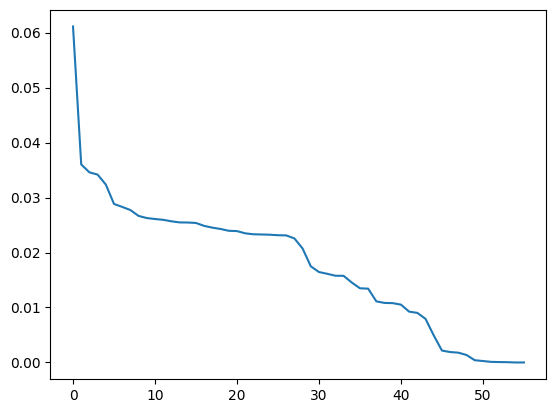

In [20]:
feature_importance = pd.Series(model.feature_importances_, index= x_cols).sort_values(ascending= False)
plt.plot(feature_importance.values)
print(feature_importance.index[:27])

In [14]:
model.score(X_test,y_test)

0.6143911439114391